(1602, 1200, 3)


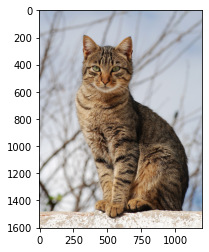

In [23]:
from matplotlib import image
from matplotlib import pyplot as plt

img = image.imread('cat.jpg')

print(img.shape)

plt.imshow(img)

# Edge Detection

(1602, 1200)


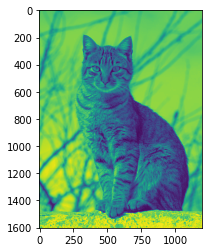

In [24]:
import cv2
import numpy as np

# Converting the image to grayscale.
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

print(img_gray.shape)

plt.imshow(img_gray)

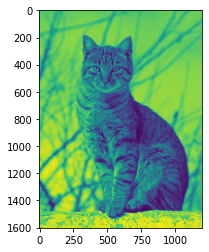

In [25]:
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)

plt.imshow(img_blur)

## Method 1: "Sobel" de openCV

<Figure size 432x288 with 0 Axes>

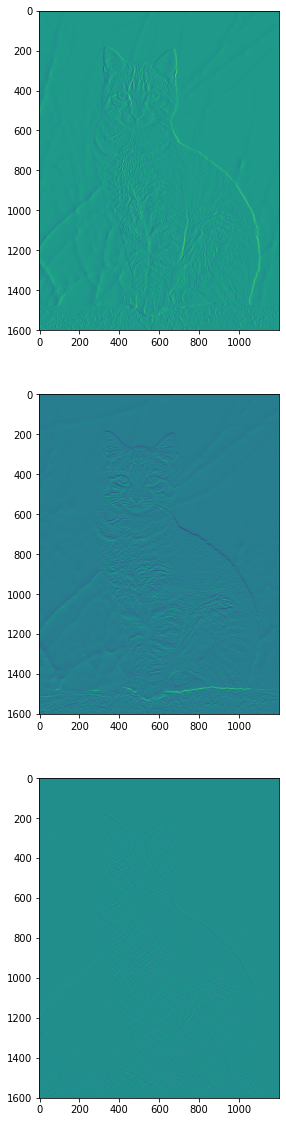

In [26]:
plt.figure()
f, ax = plt.subplots(3,1, figsize=(12, 20)) 

# Edge Detection on the X axis with kernel of shape (5,5)
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) 
ax[0].imshow(sobelx)

# Edge Detection on the Y axis with kernel of shape (5,5)
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) 
ax[1].imshow(sobely)

# Combined X and Y Edge Detection
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) 
ax[2].imshow(sobelxy)

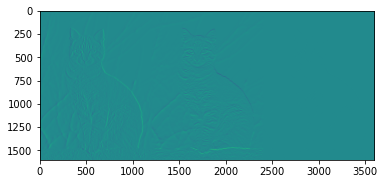

In [27]:
# Alternatively, stack the 3 images with `np.stack`

images = np.hstack((sobelx, sobely, sobelxy))

plt.imshow(images)

## Method 2: "Canny" de openCV

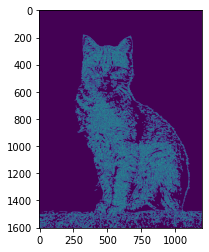

In [28]:
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
plt.imshow(edges)

# Harris Corner Detection


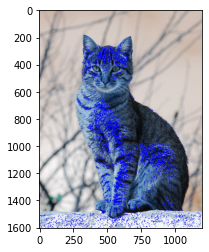

In [29]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt
  
image = cv2.imread('cat.jpg') 
  
operatedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
  
operatedImage = np.float32(operatedImage) 
  
dest = cv2.cornerHarris(operatedImage, 2, 5, 0.07) 
  
dest = cv2.dilate(dest, None) 
  
image[dest > 0.01 * dest.max()]=[0, 0, 255] 

plt.imshow(image) 

# HOG feature descriptors

In [30]:
import cv2

hog = cv2.HOGDescriptor()
im = cv2.imread('cat.jpg')
h = hog.compute(im)

h.shape

(99999900, 1)

In [31]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
img.shape

(1602, 1200, 3)

In [33]:
1200/(1602/300)

224.71910112359552

(300, 224, 3)


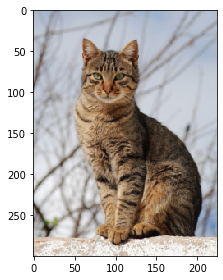

In [34]:
#resizing image

new_height = 300
new_width = int(img.shape[1] / (img.shape[0] / new_height))

resized_img = resize(img, (new_height, new_width)) 
imshow(resized_img) 
print(resized_img.shape)

In [35]:
#creating hog features 
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)

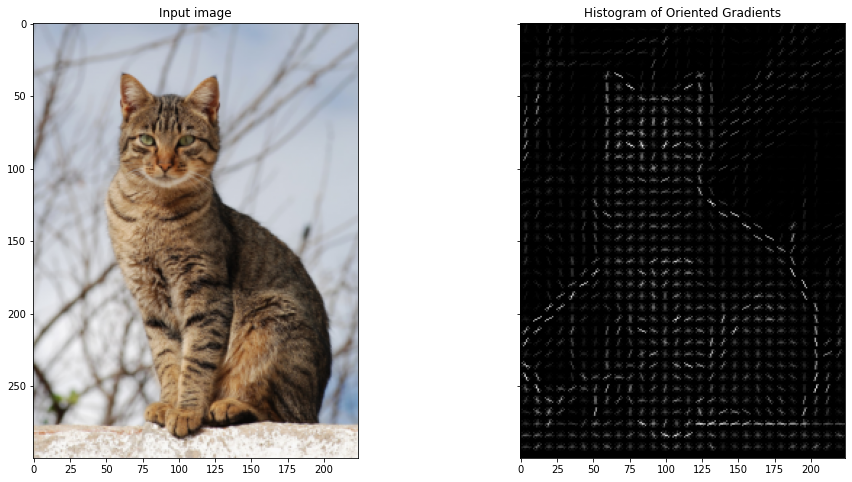

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

# SIFT

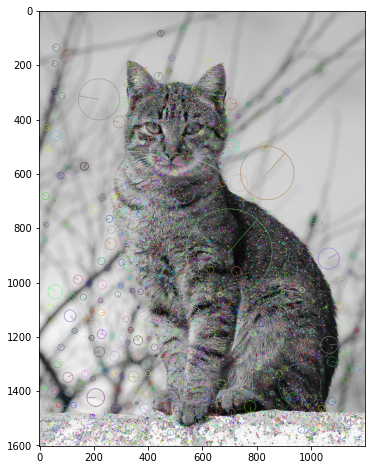

In [55]:
import numpy as np
import cv2 as cv

img = cv.imread('cat.jpg')

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

sift = cv.SIFT_create()
keypoints = sift.detect(gray,None)

sifted = cv.drawKeypoints(gray, keypoints, img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fig, ax = plt.subplots(1, 1, figsize=(16, 8)) 
ax.imshow(sifted)